# Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
%config InlineBackend.figure_format = 'svg'

In [3]:
data = pd.read_csv('test.csv')
data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [5]:
data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [6]:
data.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [7]:
#numerical = data.select_dtypes(include = ['int64', 'float64']).columns.tolist()
numerical = ['Age', 'Fare', 'SibSp', 'Parch']
numerical

['Age', 'Fare', 'SibSp', 'Parch']

In [8]:
#categorical = data.select_dtypes(include = ['object']).columns.tolist()
categorical = ['Sex', 'Cabin', 'Embarked', 'Pclass']
categorical

['Sex', 'Cabin', 'Embarked', 'Pclass']

## Numerical Features

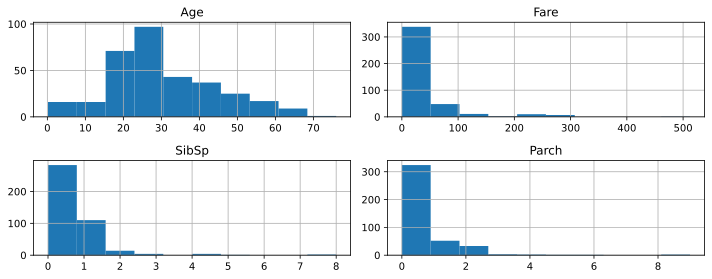

In [9]:
data[numerical].hist(figsize = (10,4))
plt.tight_layout()

<AxesSubplot:xlabel='SibSp', ylabel='count'>

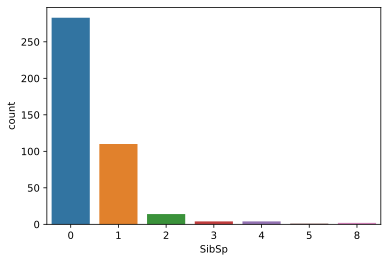

In [10]:
sns.countplot(x = data['SibSp'])

<AxesSubplot:xlabel='Parch', ylabel='count'>

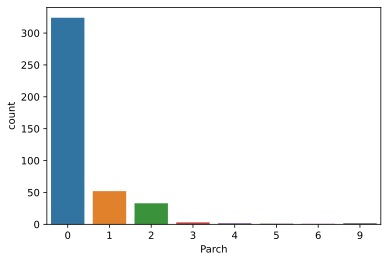

In [11]:
sns.countplot(x = data['Parch'])

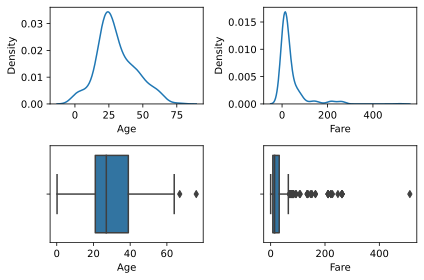

In [12]:
fig, ax = plt.subplots(2,2, sharex = False)

sns.kdeplot(data['Age'], ax = ax[0,0])
sns.kdeplot(data['Fare'], ax = ax[0,1])
sns.boxplot(x = data['Age'], ax = ax[1,0])
sns.boxplot(x = data['Fare'], ax = ax[1,1])

plt.tight_layout()

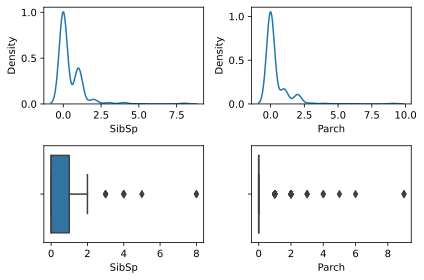

In [13]:
fig, ax = plt.subplots(2,2, sharex = False)

sns.kdeplot(data['SibSp'], ax = ax[0,0])
sns.kdeplot(data['Parch'], ax = ax[0,1])
sns.boxplot(x = data['SibSp'], ax = ax[1,0])
sns.boxplot(x = data['Parch'], ax = ax[1,1])

plt.tight_layout()

In [14]:
# for feature in [ 'Pclass', 'Parch', 'SibSp']:
#     print(feature)
#     print(data[feature].value_counts())

## Categorical Features

In [15]:
categorical

['Sex', 'Cabin', 'Embarked', 'Pclass']

In [16]:
for feature in categorical:
    print('feature ' + feature + ' has unique values:')
    print(data[feature].nunique())
    print()

feature Sex has unique values:
2

feature Cabin has unique values:
76

feature Embarked has unique values:
3

feature Pclass has unique values:
3



In [17]:
data['Embarked'].unique()

array(['Q', 'S', 'C'], dtype=object)

<AxesSubplot:xlabel='Embarked', ylabel='count'>

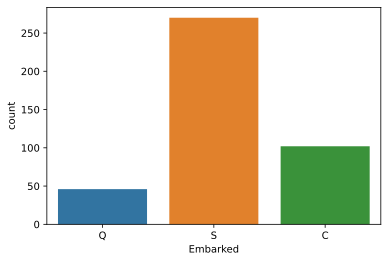

In [18]:
sns.countplot(x = data['Embarked'])

<AxesSubplot:xlabel='Sex', ylabel='count'>

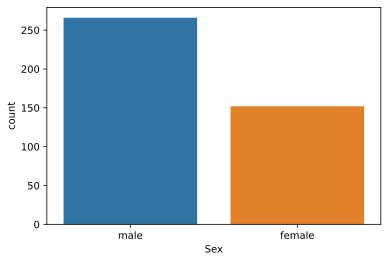

In [19]:
sns.countplot(x = data['Sex'])

## Correlation and Target Variable

In [20]:
plt.pie(data['Survived'].value_counts(), labels = ['Died', 'Survived'], autopct = '%1.1f%%')
plt.title('Proportion of Survived')
plt.show()

KeyError: 'Survived'

<AxesSubplot:>

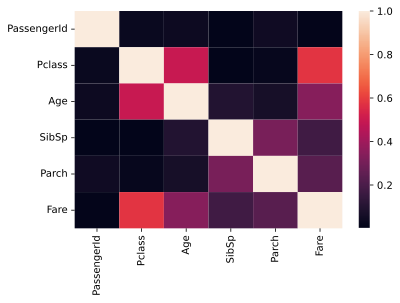

In [21]:
sns.heatmap(data.corr().abs())

### Categorical

In [22]:
categorical

['Sex', 'Cabin', 'Embarked', 'Pclass']

In [23]:
sns.countplot(x = data['Pclass'], hue = data['Survived'])
plt.title('Survival Distribution Across Pclass (Ticket Class)')
plt.show()

KeyError: 'Survived'

In [24]:
sns.countplot(x = data['Embarked'], hue = data['Survived'])
plt.title('Survival Distribution Across Embarked (Port of Embarkation)')
plt.show()

KeyError: 'Survived'

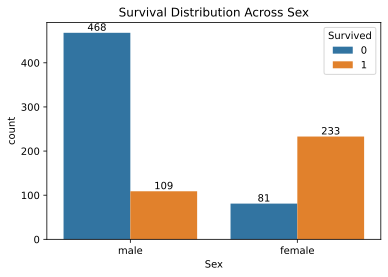

In [24]:
ax = sns.countplot(x = data['Sex'], hue = data['Survived'])
for container in ax.containers:
    ax.bar_label(container)
plt.title('Survival Distribution Across Sex')
plt.show()   

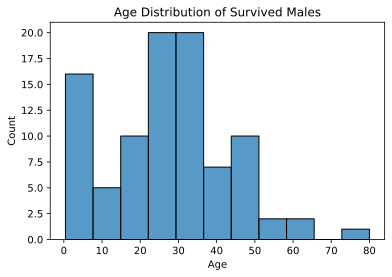

In [25]:
male = data[data['Sex'] == 'male']
survived_male_age = male[male['Survived'] == 1]['Age']
sns.histplot(x = survived_male_age)
plt.title('Age Distribution of Survived Males')
plt.show()

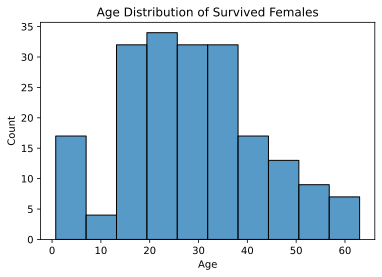

In [26]:
female = data[data['Sex'] == 'female']
survived_female_age = female[female['Survived'] == 1]['Age']
sns.histplot(x = survived_female_age)
plt.title('Age Distribution of Survived Females')
plt.show()

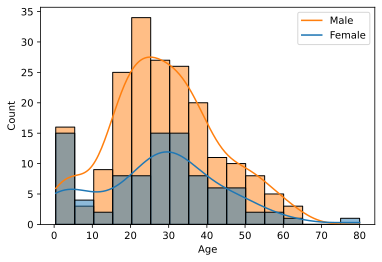

In [27]:
mf = pd.concat([survived_male_age, survived_female_age],ignore_index = True, axis = 1)
sns.histplot(data = mf, kde = True)
plt.legend(['Male', 'Female'])
plt.xlabel('Age')
plt.show()

### Numerical

In [25]:
numerical

['Age', 'Fare', 'SibSp', 'Parch']

In [26]:
sns.scatterplot(x = data['Age'], y = data['Fare'], hue = data['Survived'] )
plt.ylim(0,600)

KeyError: 'Survived'

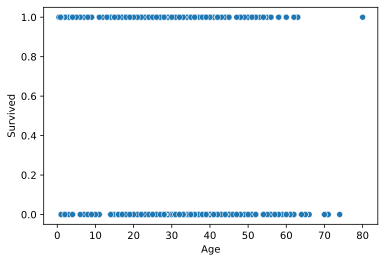

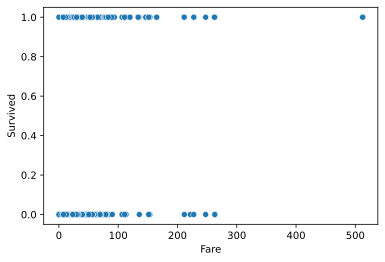

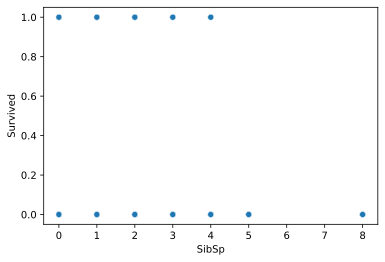

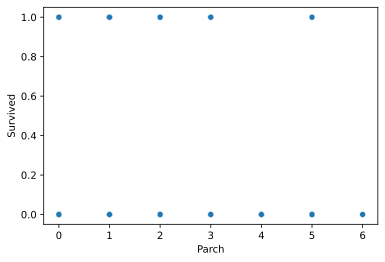

In [165]:
sns.scatterplot(x = data['Age'], y = data['Survived'])
plt.show()

sns.scatterplot(x = data['Fare'], y = data['Survived'])
plt.show()

sns.scatterplot(x = data['SibSp'], y = data['Survived'])
plt.show()

sns.scatterplot(x = data['Parch'], y = data['Survived'])
plt.show()

# Missing Values

In [194]:
test = pd.read_csv('test.csv')
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [168]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [196]:
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [159]:
data['Age'] = data['Age'].fillna(data['Age'].median())

In [197]:
test['Age'] = test['Age'].fillna(test['Age'].median())
test['Fare'] = test['Fare'].fillna(test['Fare'].mean())

In [160]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [183]:
df = data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis = 1)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,28.0,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [198]:
test = test.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis = 1)
test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...
413,3,male,27.0,0,0,8.0500,S
414,1,female,39.0,0,0,108.9000,C
415,3,male,38.5,0,0,7.2500,S
416,3,male,27.0,0,0,8.0500,S


In [184]:
df = df.dropna(axis = 0).reset_index(drop = True)

In [199]:
test = test.dropna(axis = 0).reset_index(drop = True)

In [185]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
884,0,2,male,27.0,0,0,13.0000,S
885,1,1,female,19.0,0,0,30.0000,S
886,0,3,female,28.0,1,2,23.4500,S
887,1,1,male,26.0,0,0,30.0000,C


In [200]:
test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...
413,3,male,27.0,0,0,8.0500,S
414,1,female,39.0,0,0,108.9000,C
415,3,male,38.5,0,0,7.2500,S
416,3,male,27.0,0,0,8.0500,S


In [186]:
y = df['Survived']

In [188]:
X = df.drop('Survived', axis = 1)

In [191]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...
884,2,male,27.0,0,0,13.0000,S
885,1,female,19.0,0,0,30.0000,S
886,3,female,28.0,1,2,23.4500,S
887,1,male,26.0,0,0,30.0000,C


In [193]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [202]:
cat = ['Sex', 'Embarked', 'Pclass']
num = ['Age', 'SibSp', 'Parch', 'Fare']

In [204]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(handle_unknown = 'ignore')  # As discussed above, the handle_unknown is false because the model will see
                                                        #new categories in the test dataset
X_2 = encoder.fit_transform(X[cat]) # fit_transform to train data but only transform to test
test_2 = encoder.transform(test[cat])

X_encoded = pd.DataFrame(X_2.toarray())
test_encoded = pd.DataFrame(test_2.toarray())
X_encoded.set_index(X.index, inplace = True)
test_encoded.set_index(test.index, inplace = True)

In [205]:
X = pd.concat([X[num], X_encoded], axis = 1)     # Concatenate numerical features with newly created onehotencoded 
num_test = np.array(test.select_dtypes(include = ['float64', 'int64']).columns) # do the same for the test data.
test = pd.concat([test[num], test_encoded], axis = 1)

In [206]:
X

,Age,SibSp,Parch,Fare,0,1,2,3,4,5,6,7
0,22.0,1,0,7.2500,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,38.0,1,0,71.2833,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,26.0,0,0,7.9250,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,35.0,1,0,53.1000,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,35.0,0,0,8.0500,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
884,27.0,0,0,13.0000,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
885,19.0,0,0,30.0000,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
886,28.0,1,2,23.4500,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
887,26.0,0,0,30.0000,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0


In [207]:
test

,Age,SibSp,Parch,Fare,0,1,2,3,4,5,6,7
0,34.5,0,0,7.8292,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,47.0,1,0,7.0000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,62.0,0,0,9.6875,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
3,27.0,0,0,8.6625,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
4,22.0,1,1,12.2875,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
413,27.0,0,0,8.0500,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
414,39.0,0,0,108.9000,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
415,38.5,0,0,7.2500,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
416,27.0,0,0,8.0500,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0


# Model training

In [214]:
final = pd.read_csv('gender_submission.csv')
final

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

### Logistic Regression

In [251]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(loss = 'log', max_iter = 2000, learning_rate = 'constant', eta0 = 0.001, alpha = 0) .fit(X_train, y_train)
sgd.score(X_test,y_test)

0.7528089887640449

In [246]:
final['Survived'] = sgd.predict(test)
final.to_csv('Final_sgd.csv', index = False)

### SVM

In [274]:
from sklearn.linear_model import SGDClassifier
svm = SGDClassifier(loss = 'hinge', max_iter = 2000, learning_rate = 'constant', eta0 = 0.001, alpha = 0).fit(X_train, y_train)
svm.score(X_test,y_test)

0.8146067415730337

In [275]:
final['Survived'] = svm.predict(test)
final.to_csv('Final_svm.csv', index = False)

### Random Forest

In [27]:
from sklearn.tree import DecisionTreeClassifier
clf_tree = DecisionTreeClassifier(criterion="entropy", max_depth=2, random_state=17).fit(X_train, y_train)
clf_tree.score(X_test, y_test)

NameError: name 'X_train' is not defined

In [247]:
final['Survived'] = clf_tree.predict(test)
final.to_csv('Final_dtc.csv', index = False)

### knn


In [248]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=6).fit(X_train_scaled, y_train)
knn.score(X_test_scaled, y_test)

0.8089887640449438

In [249]:
final['Survived'] = knn.predict(test)
final.to_csv('Final_knn.csv', index = False)